# Exploratory Data Analysis of Grocery Sales 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data = pd.read_csv(r"C:\Users\chris\Downloads\archive (7)\Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [8]:
data.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [14]:
data.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


# Null Values & Duplicate Values

In [10]:
data.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

No null values present in the dataset

In [12]:
data.duplicated().any()

False

No duplicate values present in the dataset

In [266]:
data.dtypes

Order ID                 object
Customer Name            object
Category                 object
Sub Category             object
City                     object
Order Date       datetime64[ns]
Region                   object
Sales                     int64
Discount                float64
Profit                  float64
State                    object
Order Year                int64
dtype: object

In [38]:
data['Order Date'] = data['Order Date'].astype(int)

In [39]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Total Sales by region

In [95]:
region = pd.pivot_table(data=data, index='Region', values=['Order ID', 'Sales'], 
               aggfunc = {'Order ID':'count', 'Sales':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
region

,Region,Order ID,Sales
4,West,3203,4798743
1,East,2848,4248368
0,Central,2323,3468156
3,South,1619,2440461
2,North,1,1254


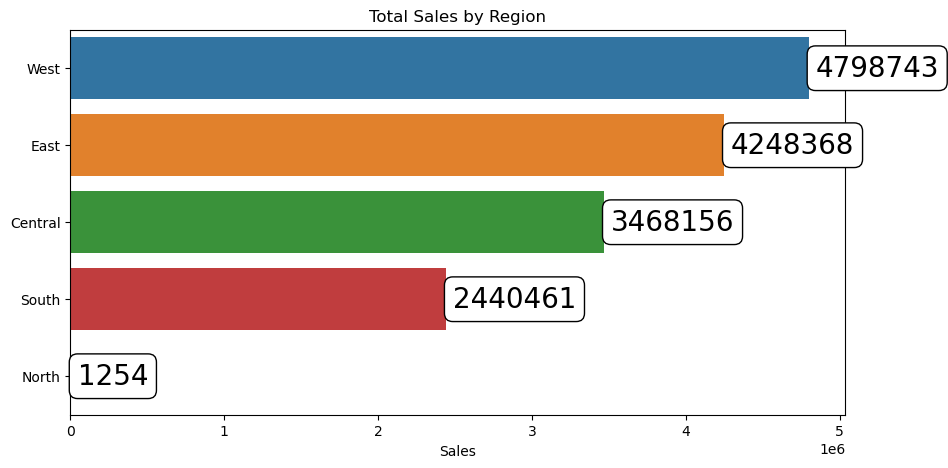

In [317]:
ax = plt.axes()
sns.barplot(x='Sales',y='Region',data=region)
 
for i in ax.containers:
    ax.bar_label(i,label_type='edge',padding=5,fontsize=20,bbox=bbox_args,fmt="%d")
plt.title('Total Sales by Region')
plt.ylabel(None)
plt.show()

# Total Orders by Region

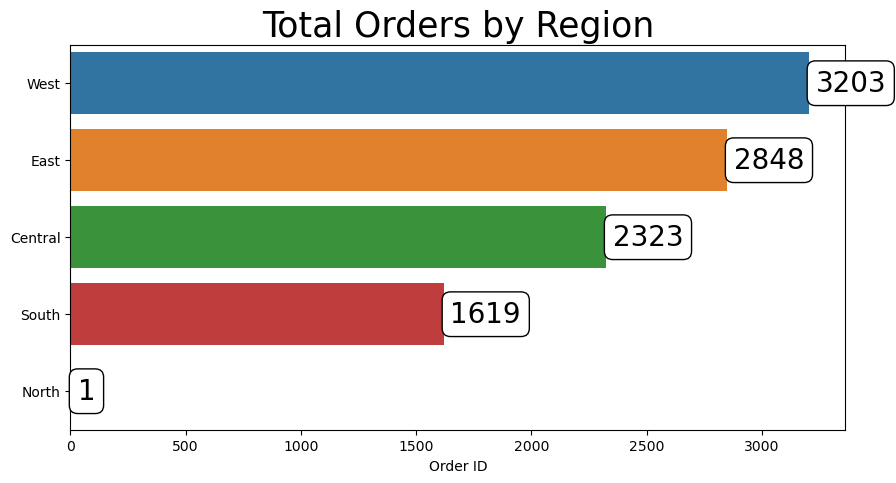

In [316]:
ax = plt.axes()
sns.barplot(y='Region', x='Order ID', data=region)

for i in ax.containers:
    ax.bar_label(i,label_type='edge',padding=5,fontsize=20,bbox=bbox_args)

plt.title('Total Orders by Region',fontsize=25)
plt.ylabel(None)
plt.show()

In [192]:
data.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,1970-01-01 00:00:00.011082017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,1970-01-01 00:00:00.011082017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,1970-01-01 00:00:00.006122017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,1970-01-01 00:00:00.010112016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,1970-01-01 00:00:00.010112016,South,2355,0.26,918.45,Tamil Nadu


# Total Sales by Category and Sub Category

In [195]:
category_sales = pd.pivot_table(data=data,index=['Category','Sub Category'],values='Sales',
                                aggfunc='sum').reset_index().sort_values(['Category','Sales'],ascending=False)

In [196]:
category_sales

,Category,Sub Category,Sales
21,Snacks,Cookies,768213
22,Snacks,Noodles,735435
20,Snacks,Chocolates,733898
18,Oil & Masala,Masalas,697480
19,Oil & Masala,Spices,672876
17,Oil & Masala,Edible Oil & Ghee,668086
13,Fruits & Veggies,Fresh Fruits,551212
14,Fruits & Veggies,Fresh Vegetables,525842
16,Fruits & Veggies,Organic Vegetables,520271
15,Fruits & Veggies,Organic Fruits,503402


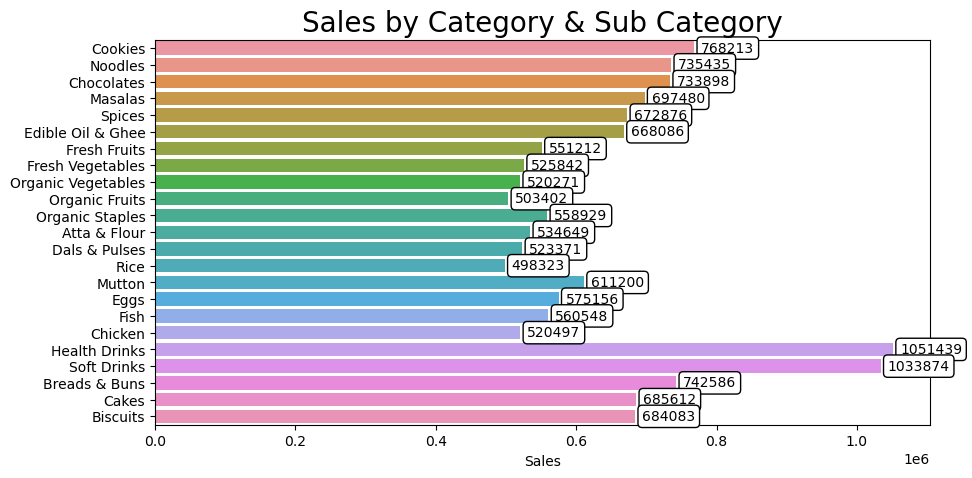

In [319]:
ax = plt.axes()
sns.barplot(x='Sales',y='Sub Category',data=category_sales)
for i in ax.containers:
    ax.bar_label(i,label_type='edge',padding=5,fontsize = 10,bbox = bbox_args,fmt='%d')
plt.title('Sales by Category & Sub Category',fontsize=20)
plt.ylabel(None)
plt.show()

# Profit margin by sub category

In [211]:
data.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [225]:
prof_margin = pd.pivot_table(data=data,index='Sub Category',values=['Sales','Profit'],aggfunc='sum').reset_index()
prof_margin['Profit Margin'] = round(prof_margin['Profit']/prof_margin['Sales']*100,2)
prof_margin.sort_values(by='Profit Margin',ascending=False,inplace=True)
prof_margin

,Sub Category,Profit,Sales,Profit Margin
16,Noodles,193685.81,735435,26.34
10,Fish,147248.01,560548,26.27
17,Organic Fruits,130862.33,503402,26.00
18,Organic Staples,144136.89,558929,25.79
2,Breads & Buns,190764.98,742586,25.69
19,Organic Vegetables,133596.37,520271,25.68
20,Rice,126932.36,498323,25.47
13,Health Drinks,267469.79,1051439,25.44
8,Edible Oil & Ghee,168593.58,668086,25.24
9,Eggs,144669.92,575156,25.15


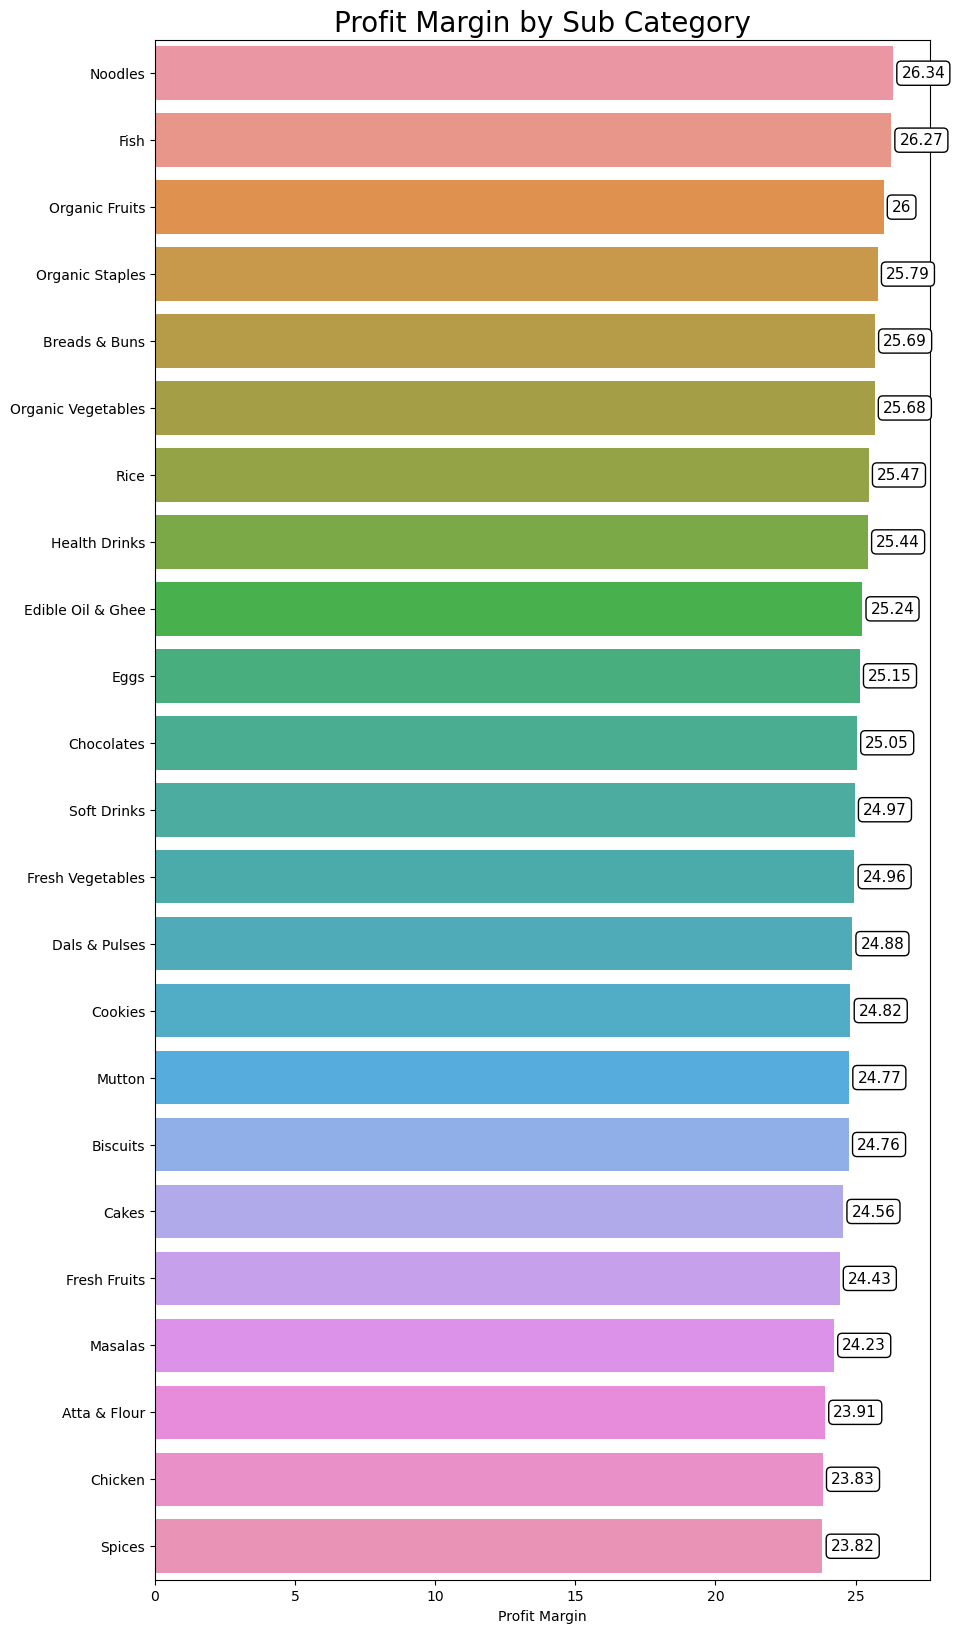

In [242]:
# Adjusting size of figure
plt.rcParams['figure.figsize'] = (10,20)
ax = plt.axes()
sns.barplot(x='Profit Margin',y='Sub Category',data=prof_margin)
for i in ax.containers:
    ax.bar_label(i,padding=6,fontsize=11,bbox=bbox_args)
    
plt.title('Profit Margin by Sub Category',fontsize=20)
plt.ylabel(None)
plt.show()


# Total Sales & Orders by Year

In [243]:
data.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,1970-01-01 00:00:00.011082017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,1970-01-01 00:00:00.011082017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,1970-01-01 00:00:00.006122017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,1970-01-01 00:00:00.010112016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,1970-01-01 00:00:00.010112016,South,2355,0.26,918.45,Tamil Nadu


In [252]:
year_performance = pd.pivot_table(data=data, index='Order ', values=['Order ID', 'Sales', 'Profit'], 
               aggfunc={'Order ID':'count', 'Sales':'sum', 'Profit':'sum'}).reset_index()
year_performance

,Order Year,Order ID,Profit,Sales
0,1970,9994,3747121.2,14956982


In [267]:
data = pd.read_csv(r"C:\Users\chris\Downloads\archive (7)\Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [269]:
data['Order Year'] = data['Order Date'].str[-4:]
data['Order Year'].value_counts()

2018    3312
2017    2587
2016    2102
2015    1993
Name: Order Year, dtype: int64

In [272]:
year_performance = pd.pivot_table(data=data, index='Order Year', values=['Order ID', 'Sales', 'Profit'], 
               aggfunc={'Order ID':'count', 'Sales':'sum', 'Profit':'sum'}).reset_index()
year_performance

,Order Year,Order ID,Profit,Sales
0,2015,1993,752529.11,2975599
1,2016,2102,797192.99,3131959
2,2017,2587,953216.22,3871912
3,2018,3312,1244182.88,4977512


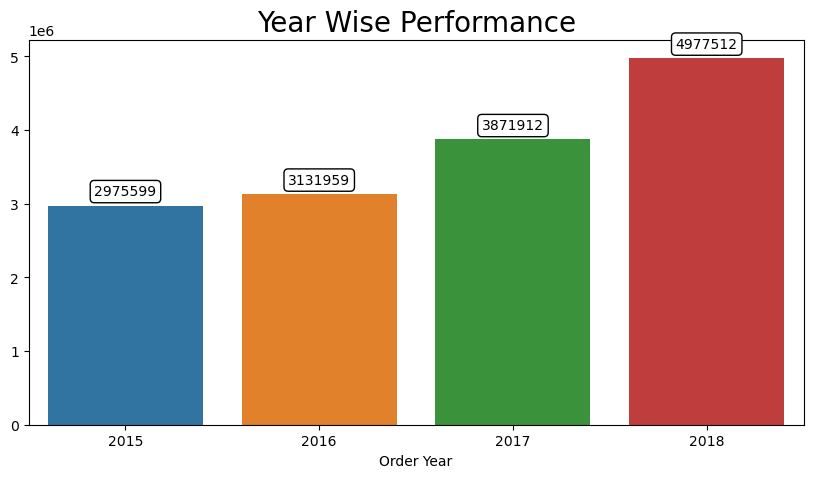

In [315]:
# Resizing the figure
plt.rcParams['figure.figsize'] = (10,5)
ax = sns.barplot(x='Order Year',y='Sales',data=year_performance,)
for i in ax.containers:
    ax.bar_label(i,padding=5,fontsize=10,bbox=bbox_args,fmt = '%d')
plt.ylabel(None)
plt.title('Year Wise Performance',fontsize=20)
plt.show()


In [371]:
data.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,2016


# Total Sales by Cities

In [396]:
city_sales = pd.pivot_table(data=data, index=['City','Order Year'], values=['Sales', 'Profit'], 
               aggfunc={'Sales':'sum', 'Profit':'sum'}).reset_index()
city_sales = city_sales.sort_values(by='Sales',ascending=False)
city_sales

,City,Order Year,Profit,Sales
27,Kanyakumari,2018,61504.79,263243
11,Coimbatore,2018,59836.89,232831
71,Tenkasi,2018,57448.63,232412
3,Bodi,2018,58880.87,230626
63,Ramanadhapuram,2018,52641.46,227804
...,...,...,...,...
45,Namakkal,2016,24780.63,105114
80,Trichy,2015,25489.56,103001
60,Ramanadhapuram,2015,27478.04,102407
36,Madurai,2015,25403.58,98886


Text(0, 0.5, '')

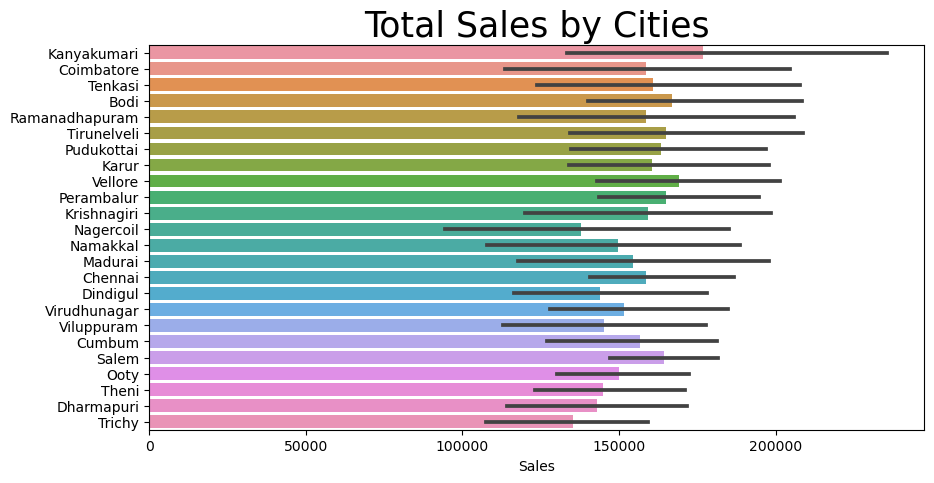

In [397]:
sns.barplot(x='Sales',y='City',data=city_sales)
for i in ax.containers:
    ax.bar_label(i,label_type='edge',padding=7,bbox=bbox_args)
plt.title('Total Sales by Cities',fontsize=25)
plt.ylabel(None)

# Obeservations / Insights

From the above visulaisations, here are some various insights:
- The most sales & orders was from the West region
- The highest sales by category & sub-category comes from Health Drinks
- The lowest sales by category & sub-category comes from Dals & Pulses
- The sub-category with the highest profit margin is Noodles with a profit margin of 26.34%
- The sub-category with the lowest profit margin is Spices with a profit margin of 23.82%
- The city 'Kanyakumari' has the most number of sales in overall years
- The city 'Nagercoil' has the least number of sales in overall years


In [320]:
data.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,2016


#  Top 10 Customers with the most number of orders

In [403]:
customers = data['Customer Name'].value_counts().head(10)

In [401]:
customers

Amrish      227
Krithika    224
Verma       218
Arutra      218
Vidya       215
Shah        215
Suresh      212
Surya       209
Harish      208
Hussain     208
Name: Customer Name, dtype: int64

In [343]:
data.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,2016


# Category with Top 3 position in sales (overall years)

In [368]:
top3_sales = pd.pivot_table(data=data, index='Category', columns = 'Order Year', values='Sales', aggfunc='sum').reset_index()
top3_sales['2015_Rank']=top3_sales['2015'].rank(method='max',ascending=False)
top3_sales['2016_Rank']=top3_sales['2016'].rank(method='max',ascending=False)
top3_sales['2017_Rank']=top3_sales['2017'].rank(method='max',ascending=False)
top3_sales['2018_Rank']=top3_sales['2018'].rank(method='max',ascending=False)
top3_sales

Order Year,Category,2015,2016,2017,2018,2015_Rank,2016_Rank,2017_Rank,2018_Rank
0,Bakery,433979,487965,504263,686074,3.0,1.0,7.0,6.0
1,Beverages,409091,425719,543575,706928,6.0,6.0,5.0,4.0
2,"Eggs, Meat & Fish",482982,462055,565101,757263,1.0,3.0,3.0,2.0
3,Food Grains,356704,438736,609338,710494,7.0,4.0,1.0,3.0
4,Fruits & Veggies,409212,468441,516400,706674,5.0,2.0,6.0,5.0
5,Oil & Masala,423918,412725,564196,637603,4.0,7.0,4.0,7.0
6,Snacks,459713,436318,569039,772476,2.0,5.0,2.0,1.0


In [369]:
top3_sales[(top3_sales['2015_Rank'] <=3) & (top3_sales['2016_Rank'] <=3) & (top3_sales['2017_Rank'] <=3) & (top3_sales['2018_Rank'] <=3)]


Order Year,Category,2015,2016,2017,2018,2015_Rank,2016_Rank,2017_Rank,2018_Rank
2,"Eggs, Meat & Fish",482982,462055,565101,757263,1.0,3.0,3.0,2.0


Eggs, Meat & Fish Category is consistent in the sales across years.